#Ising Model 1d



##python function


'n' is matrix size 


In [57]:
import random, math
import matplotlib.pyplot as plt
import numpy as np

global n, J, N, kb

n = 20
J = 1
kb = 1.3

## Functions

1. Make random matrix (composed of -1 and 1 )

In [58]:
def mk_matrix_1d():
    data_init = np.zeros([n])
    data_init = np.random.choice([-1,1], size = (n))
    return data_init

2. Determine whether to flip 

    Get the random xy coordinate and Determine whether to flip that coordinate by comparing pi value

    beta = 1 / temperature

In [59]:
def pi_value_1d(data_unit, beta):

    Energy = 0

    x = random.randint(0,(n-1))

    right = data_unit[(x+1)%n]
    left = data_unit[(x-1)%n]
    Energy += data_unit[x] * (right + left)

    pi_a = math.exp((+1)*beta*Energy)
    pi_b = math.exp((-1)*beta*Energy)
    pi_divided = pi_b / pi_a

    if pi_divided <= 1:
        if random.random() < pi_divided:
            data_unit[x] = -data_unit[x]
    elif pi_divided > 1:
        data_unit[x] = -data_unit[x]

    return data_unit

3. Repeat determining whether to flip 

    for making randomized matrix

    beta = 1/0.1



In [60]:
def matrix_repeat_1d(number, matrix_matrix):
    for i in range(number):
        matrix_matrix = pi_value_1d(matrix_matrix, 1/0.1)
    return matrix_matrix

4. Calculate Average Energy, Magnetization, Heat Capacity, Susceptibility
    
    in certain temperature

In [61]:
def cal_temperature(matrix_cal, beta):

    Sum_Energy = 0
    Sum_Energy_square = 0
    Avg_Energy = 0
    Avg_Energy_square = 0
    Sum_M_square = 0
    Sum_M = 0
    Avg_M=0
    Avg_M_square = 0

    Sum_Hc = 0
    Sum_Sus = 0

    #Repeat N times

    for j in range(N):

        H = 0
        H_square = 0

        #Calculate Hamiltonian
        
        for x in range(n):
            right = matrix_cal[(x+1)%n]
            left = matrix_cal[(x-1)%n]

            h_temp =  -J * (matrix_cal[x] * (right + left)) / 2
                
            H += h_temp / (n)
            H_square += h_temp**2 / (n)

        Sum_Hc += beta * beta * (H_square - H*H)
        
        M = np.sum(matrix_cal)

        Sum_Energy += H
        Sum_Energy_square += H_square
        Sum_M += abs(M)
        Sum_M_square += M*M
        matrix_cal = pi_value_1d(matrix_cal, beta)

    #Get average values by dividing N

    Avg_Energy = Sum_Energy / N
    Avg_Energy_square = Sum_Energy_square / N
    Avg_M = beta * Sum_M / N
    Avg_M_square = beta * Sum_M_square / N
    Avg_Hc = Sum_Hc / N * 3
    Sus = - (beta**2) * ((Avg_M_square) - Avg_M*Avg_M) /(n)

    return Avg_Energy, Avg_M, Avg_Hc, Sus, matrix_cal

## Main Code



1. Make matrix and Randomize

    N is repeat number
    
    T is temperature matrix (from 1.0K to 5.0K with 0.01 interval)

In [62]:
init = mk_matrix_1d()
matrix_cel = matrix_repeat_1d(50000, init)

N = 50000

#T = np.arage(start temperature, end temperature, interval)
T = np.arange(0.4, 5.1, step=0.025)



2. Calculate Average Energy, Heat Capaticy, Magnetizaion, Susceptibility

    from 1.0K to 5.0K

In [63]:
result_Avg_Energy = []
result_Hc = []
result_Sus = []
result_Mg = []
result_matrix = []

for i in range(len(T)):
    temp1, temp2, temp3, temp4, temp5 = cal_temperature(matrix_cel, 1/(kb*T[i]))
    result_Avg_Energy.append(temp1)
    result_Mg.append(temp2)
    result_Hc.append(temp3)
    result_Sus.append(temp4)

    if i % 4 == 0:
        print(T[i], temp5)

0.4 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.5000000000000001 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
0.6000000000000002 [-1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]
0.7000000000000003 [-1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
0.8000000000000004 [ 1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1]
0.9000000000000005 [ 1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1]
1.0000000000000004 [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1]
1.1000000000000005 [-1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1]
1.2000000000000006 [-1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1.3000000000000007 [-1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
1.4000000000000008 [-1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
1.5000000000000009 [-1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1]
1.600000000000001 [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1

3. Graph

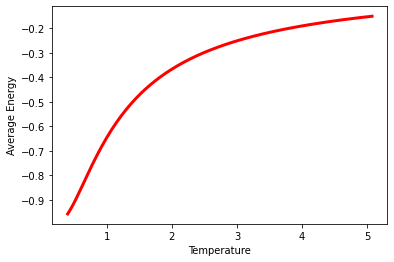

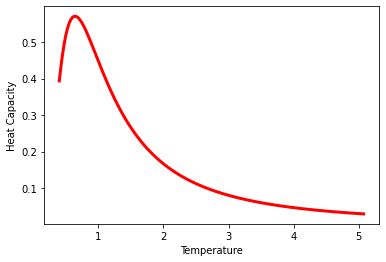

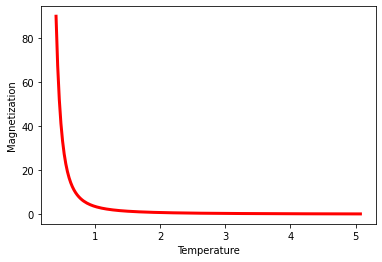

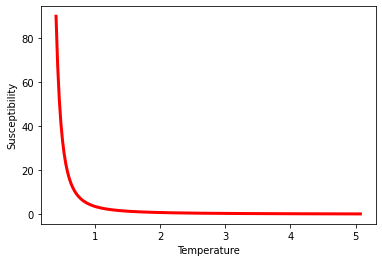

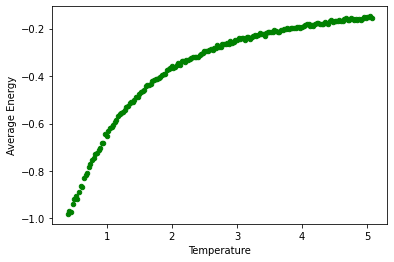

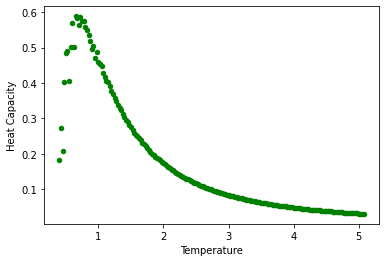

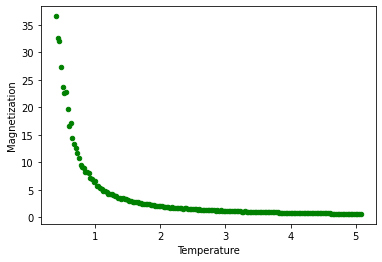

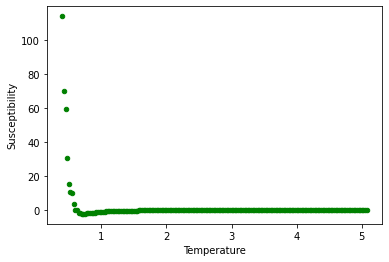

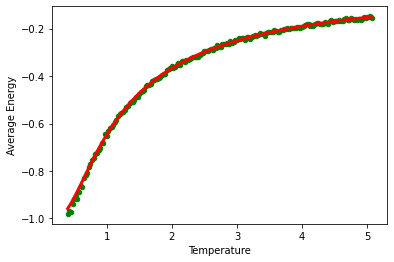

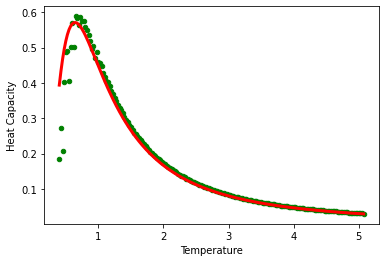

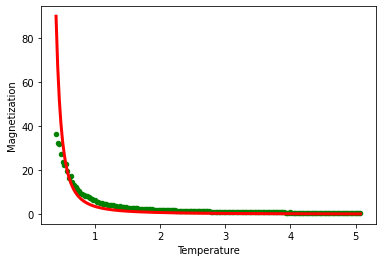

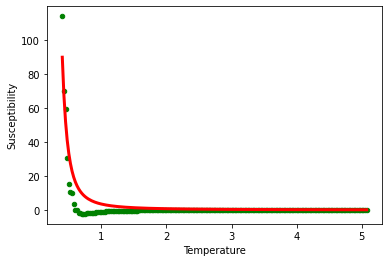

In [64]:
plt.plot(T, -np.tanh(1/(kb*T)), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Average Energy')
plt.show()

plt.plot(T, (J**2)/(kb*(T**2))*((1/(np.cosh(J/(kb*T))))**2), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.show()

plt.plot(T, (1/(kb*T)*np.exp(2/(kb*T))), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

plt.plot(T, 1/(kb*T)*np.exp(2/(kb*T)), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.show()

#scatter
plt.scatter(T, result_Avg_Energy, s=20, color='g')
plt.xlabel('Temperature')
plt.ylabel('Average Energy')
plt.show()

plt.scatter(T, result_Hc, s=20, color='g')
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.show()

plt.scatter(T, result_Mg, s=20, color='g')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

plt.scatter(T, result_Sus, s=20, color='g')
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.show()

plt.scatter(T, result_Avg_Energy, s=20, color='g')
plt.plot(T, -np.tanh(1/(kb*T)), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Average Energy')
plt.show()

plt.scatter(T, result_Hc, s=20, color='g')
plt.plot(T, (J**2)/(kb*(T**2))*((1/(np.cosh(J/(kb*T))))**2), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.show()

plt.scatter(T, result_Mg, s=20, color='g')
plt.plot(T, (1/(kb*T)*np.exp(2/(kb*T))), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

plt.scatter(T, result_Sus, s=20, color='g')
plt.plot(T, 1/(kb*T)*np.exp(2/(kb*T)), color='r', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.show()


In [65]:
"""
print(result_matrix[0])

plt.matshow(result_matrix)
plt.colorbar()
plt.show()

print(result_matrix[0])
print(result_matrix[1])
"""

'\nprint(result_matrix[0])\n\nplt.matshow(result_matrix)\nplt.colorbar()\nplt.show()\n\nprint(result_matrix[0])\nprint(result_matrix[1])\n'